<a href="https://colab.research.google.com/github/e-s-23/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#陣取りゲームプログラム
詳細はREADME

## 元画像作成

In [ ]:
import numpy as np
import cv2,glob

board1 = np.zeros((100,100,3),np.uint8)
board2 = np.zeros((100,100,3),np.uint8)

cv2.rectangle(board1,(0,0),(100,100),color = (255,0,0),thickness = -1)
cv2.rectangle(board2,(0,0),(100,100),color = (0,0,255),thickness = -1)

cv2.imwrite("Blue.png",board1)
cv2.imwrite("Red.png",board2)

True

## 手札作成

In [ ]:
import numpy as np
import cv2,sys
from google.colab.patches import cv2_imshow

class Tile():
    def __init__(self, img, matrix):
        self.mapimg = img
        self.base = matrix
        self.board = self.make_board()
        self.h,self.w = self.h_w()
        self.index = self.select()

    def make_board(self):
        return np.zeros((300,300,3),np.uint8)

    def h_w(self):
        return self.mapimg.shape[:2]

    def select(self):
        return list(zip(*np.where(self.base == 1)))

    def paste_map(self):
        for i in self.index:
            H = i[0] * 100
            W = i[1] * 100
            self.board[H:H + self.h, W:W + self.w] = self.mapimg

        return self.board


def tile_matrix():
    T = np.zeros((3,3))
    count = 0
    while True:
        point = np.random.randint(0,3,2)
        if (T[point[0]][point[1]] == 0):
            T[point[0]][point[1]] = 1
            count += 1

        if (count == 3):
           break

    return T

img1 = cv2.imread("Blue.png")
img2 = cv2.imread("Red.png")

for i in range(1,10):
    base_matrix = tile_matrix()
    t = Tile(img1,base_matrix)
    tag = t.paste_map()
    cv2.imwrite("Blue" + str(i) + ".png",tag)

for i in range(1,10):
    base_matrix = tile_matrix()
    t = Tile(img2,base_matrix)
    tag = t.paste_map()
    cv2.imwrite("Red" + str(i) + ".png",tag)

## 手札一覧作成

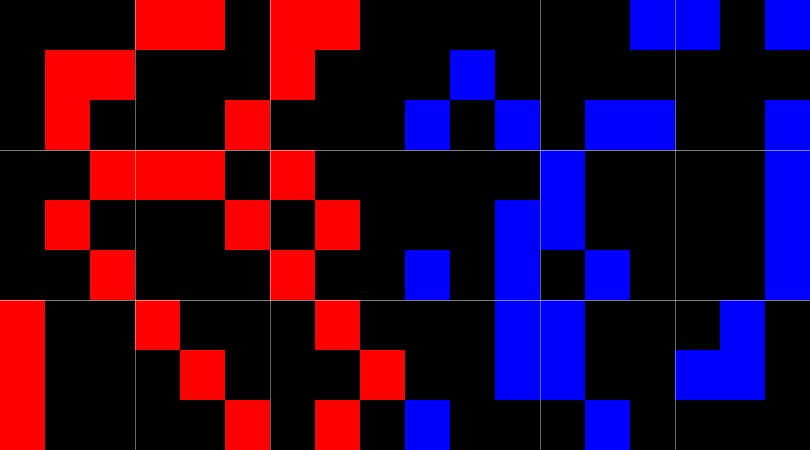

In [33]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def view_grid(color):
    board = np.ones((900,900,3),np.uint8) * 255
    count = 1

    for i in range(3):
        for j in range(3):
            img = cv2.imread(color + str(count) + ".png")
            h,w = img.shape[:2]

            H = i * 300
            W = j * 300
            board[H:H+h, W:W+w] = img
            count += 1

    y_step = 300
    x_step = 300

    board_y,board_x = board.shape[:2]
    board[y_step:board_y:y_step, :, :] = 255
    board[:, x_step:board_x:x_step, :] = 255

    cv2.imwrite(color + "_grid.png",board)

view_grid("Red")
view_grid("Blue")

Red = cv2.imread("Red_grid.png")
Blue = cv2.imread("Blue_grid.png")
merge = np.hstack((Red, Blue))
w,h = merge.shape[:2]
re_merge = cv2.resize(merge, (int(w * 0.9), int(h * 0.25)))
cv2_imshow(re_merge)

## 陣取りゲーム 一人用ver.

1ターン目
Red:どの番号の札を出しますか:9
何回転させますか:0


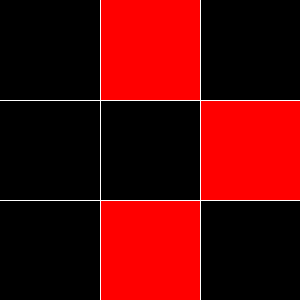

Blueは8の札を出しました
1回転です


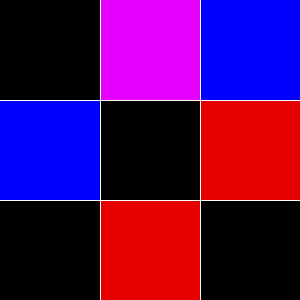

2ターン目
Red:どの番号の札を出しますか:5
何回転させますか:0


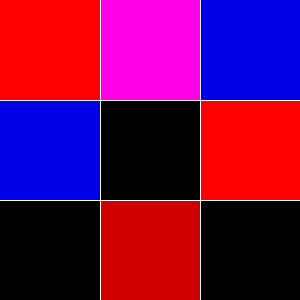

Blueは3の札を出しました
2回転です


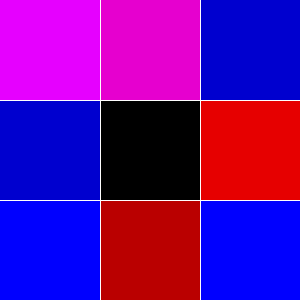

3ターン目
Red:どの番号の札を出しますか:1
何回転させますか:0


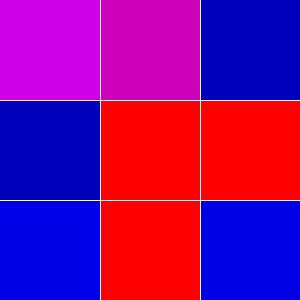

Blueは7の札を出しました
1回転です


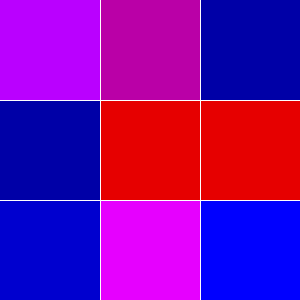

4ターン目
Red:どの番号の札を出しますか:4
何回転させますか:0


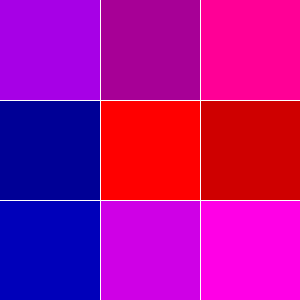

Blueは4の札を出しました
1回転です


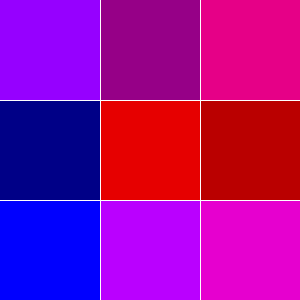

5ターン目
Red:どの番号の札を出しますか:7
何回転させますか:0


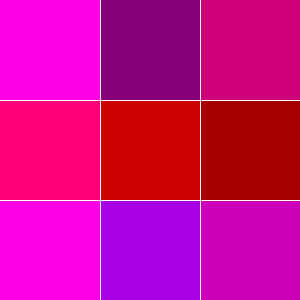

Blueは6の札を出しました
2回転です


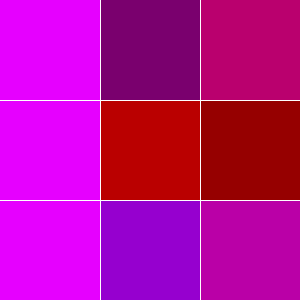

6ターン目
Red:どの番号の札を出しますか:8
何回転させますか:0


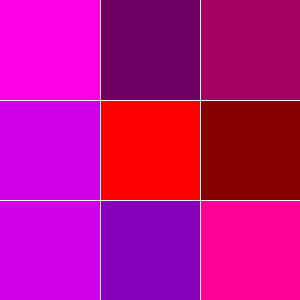

Blueは5の札を出しました
1回転です


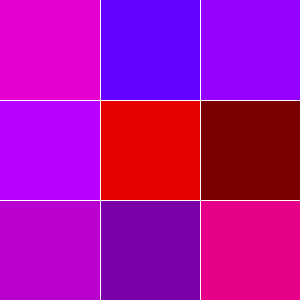

7ターン目
Red:どの番号の札を出しますか:6
何回転させますか:0


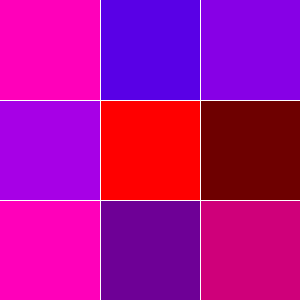

Blueは1の札を出しました
2回転です


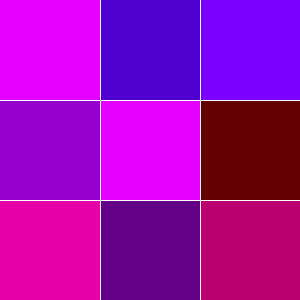

8ターン目
Red:どの番号の札を出しますか:3
何回転させますか:0


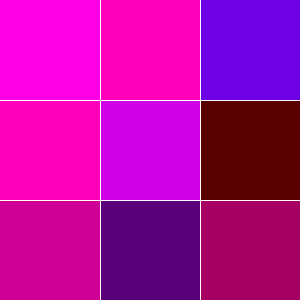

Blueは2の札を出しました
2回転です


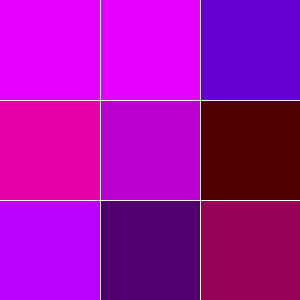

9ターン目
Red:どの番号の札を出しますか:2
何回転させますか:0


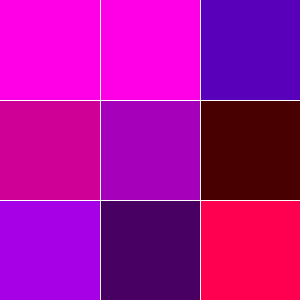

Blueは9の札を出しました
1回転です


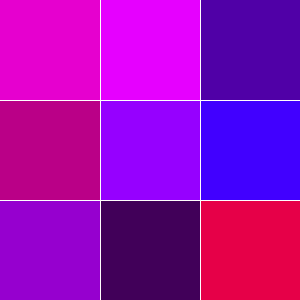

result


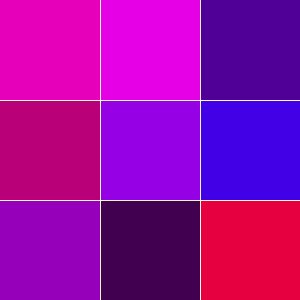

True

In [43]:
import numpy as np
import cv2

def view_grid(board):
        y_step = 100
        x_step = 100

        board_y,board_x = board.shape[:2]
        board[y_step:board_y:y_step, :, :] = 255
        board[:, x_step:board_x:x_step, :] = 255
        cv2_imshow(board)

def _rot(IMG,DEG):
    if(DEG == 0):
        d = input("何回転させますか:")

        if(d.isdecimal() == True):
            IMG = np.rot90(IMG,-int(d))

        else:
            print("再入力")
            IMG = _rot(IMG,0)

    elif(DEG == 1):
        d = np.random.randint(0,4)
        print(f'{d}{"回転です"}')
        IMG = np.rot90(IMG,-d)

    return IMG

def add_card(ID,degit):
    global game_board
    select_card = _rot(cv2.imread(ID + ".png"),degit)
    game_board = cv2.addWeighted(game_board,0.9,select_card,1,0)
    view_grid(game_board)

def check_var(s):
    if(s.isdecimal() == True):
        if(1 <= int(s) and int(s) <= 9):
            pass

        else:
            s = check_var(input("番号を再入力してください:"))

    else:
        s = check_var(input("番号を再入力してください:"))

    return int(s)

a = np.arange(1,10)
blue_id = np.random.permutation(a)

prop = cv2.imread("White.png")
game_board = np.zeros((300,300,3),np.uint8)

for i in range(9):
    print(f'{i+1}{"ターン目"}')
    id = check_var(input("Red:どの番号の札を出しますか:"))
    data = str("Red" + str(id))
    add_card(data,0)
    print(f'{"Blueは"}{blue_id[i]}{"の札を出しました"}')
    data = str("Blue" + str(blue_id[i]))
    add_card(data,1)

h = game_board.shape[0]
w = game_board.shape[1]

for iy in range(h):
    for ix in range(w):
        game_board[iy,ix][0] *= 0.9

print("result")
cv2_imshow(game_board)
cv2.imwrite("result.png",game_board)


## 陣取りゲーム 二人用ver.

1ターン目
Red:どの番号の札を出しますか:1
何回転させますか:a
再入力
何回転させますか:0


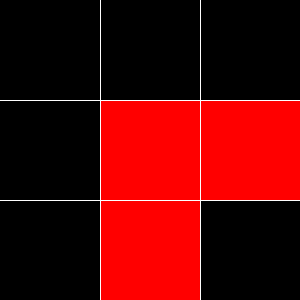

Blue:どの番号の札を出しますか:2
何回転させますか:a
再入力
何回転させますか:0


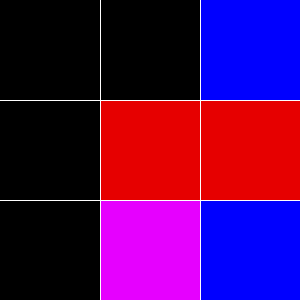

2ターン目
Red:どの番号の札を出しますか:3
何回転させますか:0


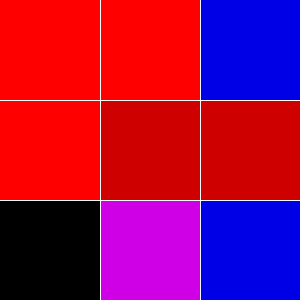

Blue:どの番号の札を出しますか:4
何回転させますか:0


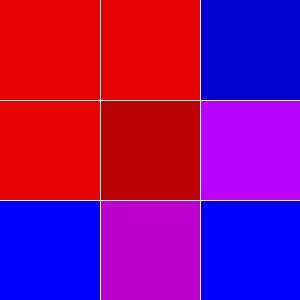

3ターン目
Red:どの番号の札を出しますか:5
何回転させますか:0


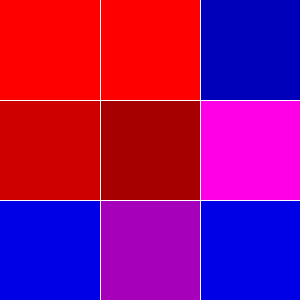

Blue:どの番号の札を出しますか:6
何回転させますか:0


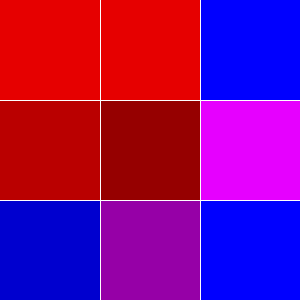

4ターン目
Red:どの番号の札を出しますか:7
何回転させますか:0


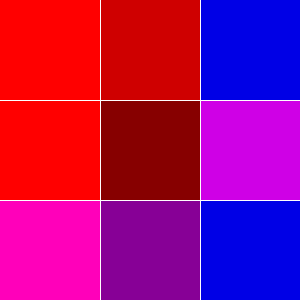

Blue:どの番号の札を出しますか:8
何回転させますか:0


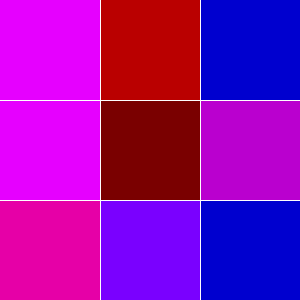

5ターン目
Red:どの番号の札を出しますか:9
何回転させますか:0


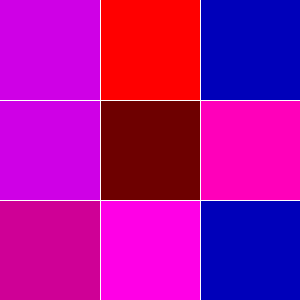

Blue:どの番号の札を出しますか:1
何回転させますか:0


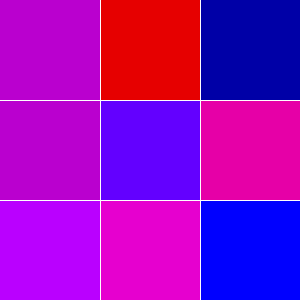

6ターン目
Red:どの番号の札を出しますか:2
何回転させますか:0


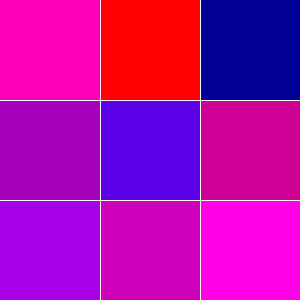

Blue:どの番号の札を出しますか:3
何回転させますか:0


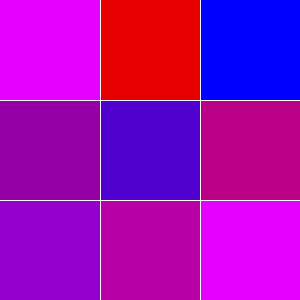

7ターン目
Red:どの番号の札を出しますか:4
何回転させますか:0


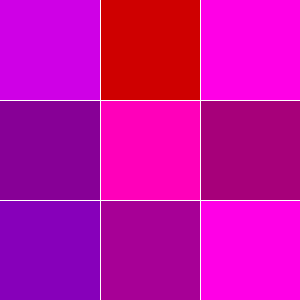

Blue:どの番号の札を出しますか:
番号を再入力してください:5
何回転させますか:0


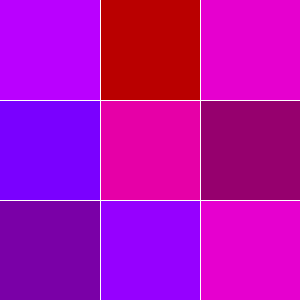

8ターン目
Red:どの番号の札を出しますか:6
何回転させますか:0


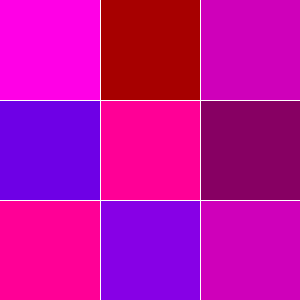

Blue:どの番号の札を出しますか:7
何回転させますか:0


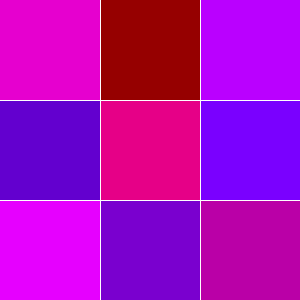

9ターン目
Red:どの番号の札を出しますか:8
何回転させますか:0


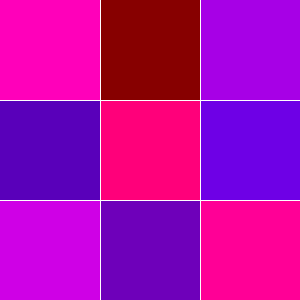

Blue:どの番号の札を出しますか:9
何回転させますか:0


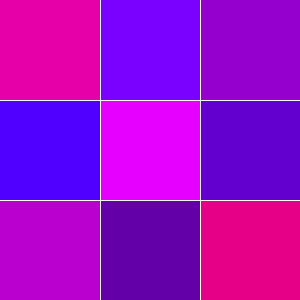

result


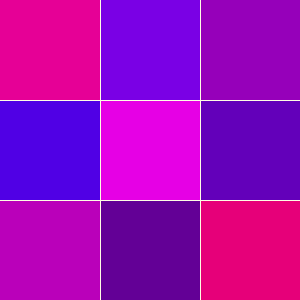

True

In [44]:
import numpy as np
import cv2

def view_grid(board):
        y_step = 100
        x_step = 100

        board_y,board_x = board.shape[:2]
        board[y_step:board_y:y_step, :, :] = 255
        board[:, x_step:board_x:x_step, :] = 255
        cv2_imshow(board)
        cv2.waitKey(1000)

def _rot(IMG):
    d = input("何回転させますか:")

    if(d.isdecimal() == True):
        IMG = np.rot90(IMG,-int(d))

    else:
        print("再入力")
        IMG = _rot(IMG)

    return IMG

def add_card(ID):
    global game_board
    select_card = _rot(cv2.imread(ID + ".png"))
    game_board = cv2.addWeighted(game_board,0.9,select_card,1,0)
    view_grid(game_board)

def check_var(s):
    if(s.isdecimal() == True):
        if(1 <= int(s) and int(s) <= 9):
            pass

        else:
            s = check_var(input("番号を再入力してください:"))

    else:
        s = check_var(input("番号を再入力してください:"))

    return s

game_board = np.zeros((300,300,3),np.uint8)

for i in range(9):
    print(f'{i+1}{"ターン目"}')
    id = check_var(input("Red:どの番号の札を出しますか:"))
    data = str("Red" + str(id))
    add_card(data)
    id = check_var(input("Blue:どの番号の札を出しますか:"))
    data = str("Blue" + str(id))
    add_card(data)

h = game_board.shape[0]
w = game_board.shape[1]

for iy in range(h):
    for ix in range(w):
        game_board[iy,ix][0] *= 0.9

print("result")
cv2_imshow(game_board)
cv2.imwrite("result.png",game_board)


## 結果表示

In [45]:
import numpy as np
import cv2

def average_rgb(IMG,H,W):
    sum_r = 0
    sum_g = 0
    sum_b = 0

    for iy in range(H):
      for ix in range(W):
        sum_b += IMG[iy,ix][0]
        sum_g += IMG[iy,ix][1]
        sum_r += IMG[iy,ix][2]

    avg_r = int(sum_r / (W * H))
    avg_g = int(sum_g / (W * H))
    avg_b = int(sum_b / (W * H))

    return avg_r,avg_g,avg_b

img = cv2.imread("result.png")

h = img.shape[0]
w = img.shape[1]

r,g,b = average_rgb(img,h,w)

if(r > b):
  print(f'{"Redの勝利！ Red score = "}{str(r)}{"  Blue score = "}{b}')

elif(r < b):
  print(f'{"Blueの勝利！ Blue score = "}{str(b)}{"  Red score = "}{r}')

elif(r == b):
  print(f'{"引き分け！ score = "}{str(b)}')

Blueの勝利！ Blue score = 185  Red score = 159
